# Data Scientist Associate Practical Exam Submission

# Data Validation 
The dataset contains **1500 rows** and **8 columns** with only one column containing Null values, I made sure all the columns were compatible with the criterias mentioned in the dataset table:

- **owned:** (0 missing values) after running the unique() function confirms that the unique values of this column matches the criteria (0 or 1), nunique() confirms that the number of these values is 2 and finally the info() function indicates that there are no null values in this column but the dtype is not compatible with the criteria. So the only **problem** in this column is the data type, I changed it from _'int64'_ to _'category'_ using astype().
- **make_model:** (0 missing values) after executing the same functions above (unique(), nunique() and info()), the only **problem** in this column is the dtype so I changed it from '_object_' to _'category'_ using astype().
- **review_month:** (0 missing values) the problem in this column is the unique values (some of the values in this column are formatted as 'day-month') so I used str.split('-',expand=True) and took the second column of the result, after checking there was 12 unique values I changed the dtype of the column to _'category'_.
- **web_browser:** the problem in this column is the presence of 150 missing value, I filled it with 'unkown' as mentioned in the criteria table, also I changed the dtype to _'category'_ to match the criteria.
- **reviewer_age:** (0 missing values) the problem in this column is the presence of an abnormal value which is '-', I replaced it with the average of all ages (after dropping the rows with this value '-'), then I changed the dtype to _'int32'_.
- **primary_use:** (0 missing values) the unique values of this column are correct, I only had to change the dtype to _'category'_.
- **value_for_money:** (0 missing values) the values of this column are formatted as 'rating / 10', So I used the str.split('/',expand=True)[0] to get only the rating, then I changed the dtype to _'int32'_.
- **overall_rating:** (0 missing values) this column matches the criteria perfectly.

### Importing the dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/electric_bike_ratings_2212.csv')
df.info(),df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


(None,
 owned                2
 make_model           6
 review_month       332
 web_browser          6
 reviewer_age        36
 primary_use          2
 value_for_money     10
 overall_rating     583
 dtype: int64)

- Printing unique values of each column.

In [24]:
{x: df[x].unique() for x in df.columns if x != 'overall_rating' }

{'owned': array([1, 0]),
 'make_model': array(['Nielah-Eyden', 'Nielah-Keetra', 'Lunna-Keetra', 'Hoang-Keetra',
        'Lunna-Eyden', 'Hoang-Eyden'], dtype=object),
 'review_month': array(['Oct', 'Jun', '23-Oct', '07-Nov', '16-Sep', '26-Aug', '01-Mar',
        '15-Mar', '09-Mar', 'Jul', '10-Nov', 'Mar', 'Apr', 'Sep', '27-Dec',
        '11-Nov', '07-Dec', 'Feb', 'Jan', '06-Jun', '12-Jul', '02-Aug',
        '23-Feb', '27-Jul', '26-Nov', '30-Apr', '31-Jul', '22-Nov',
        '05-Sep', '05-Dec', '21-Jul', '15-Nov', '07-Jun', '20-May',
        '23-Sep', '10-Sep', '19-Oct', '28-Oct', '08-Apr', '14-Feb',
        '28-Nov', '28-Feb', '28-Jul', '12-Apr', '25-Apr', '25-Oct',
        '08-Jul', '29-Mar', '22-Sep', '26-Jun', '24-May', '12-Mar',
        '15-Feb', '28-Aug', 'May', '16-Jun', '02-Jul', '06-Feb', '21-Jun',
        'Nov', '21-Apr', '19-Jul', '31-May', '11-Aug', '14-Mar', '12-Dec',
        '02-Apr', '23-Aug', '11-Feb', '24-Aug', '03-Jun', '01-Apr',
        '24-Nov', 'Dec', '26-Mar', '22-O

### Replacing missing values

In [25]:
df['review_month'] = df['review_month'].str.split('-',expand=True)[1] \
.fillna(df['review_month'].str.split('-',expand=True)[0])

df['web_browser'] = df['web_browser'].fillna('unknown')

df['reviewer_age'] = df['reviewer_age'].replace('-', \
round(df[df['reviewer_age']!='-']['reviewer_age'].astype('int32').mean()))

df['value_for_money'] = df['value_for_money'].str.split('/',expand=True)[0]

df.isna().sum()

owned              0
make_model         0
review_month       0
web_browser        0
reviewer_age       0
primary_use        0
value_for_money    0
overall_rating     0
dtype: int64

### Changing the column data types
- First we check how many unique values are there in each column.

In [26]:
df.nunique()

owned                2
make_model           6
review_month        12
web_browser          7
reviewer_age        36
primary_use          2
value_for_money     10
overall_rating     583
dtype: int64

- Changing the data types to those indicated in the criteria.
- No errors were raised, that means our data is ready for EDA.

In [27]:
df['owned'] = df['owned'].astype('category')
df['make_model'] = df['make_model'].astype('category')
df['review_month'] = df['review_month'].astype('category')
df['web_browser'] = df['web_browser'].astype('category')
df['primary_use'] = df['primary_use'].astype('category')
df['reviewer_age'] = df['reviewer_age'].astype("int32")
df['value_for_money'] = df['value_for_money'].astype("int32")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   owned            1500 non-null   category
 1   make_model       1500 non-null   category
 2   review_month     1500 non-null   category
 3   web_browser      1500 non-null   category
 4   reviewer_age     1500 non-null   int32   
 5   primary_use      1500 non-null   category
 6   value_for_money  1500 non-null   int32   
 7   overall_rating   1500 non-null   float64 
dtypes: category(5), float64(1), int32(2)
memory usage: 32.1 KB


# Data Visualization
1. From Graph 1 we can see that 'owner' category of the target variable has more observations than 'non-owner'. (approx: 'owner':60%, 'non-owner':40%)
2. From Graph 2, 3, 4 we can conclude that observations are even more unbalanced than the first graph across all categories.
3. From Graph 5, it seems that the overall ratings values does not follow a common distribution maybe due to low number of observations, but we can see that high value ratings are very common, average ratings are less common and low ratings are the least common.
4. From the final graph (Graph 6), ce can conclude that overall rating is usually higher for owners than non-owners, of course with some outliers.

### Owners and non-owners count visualization

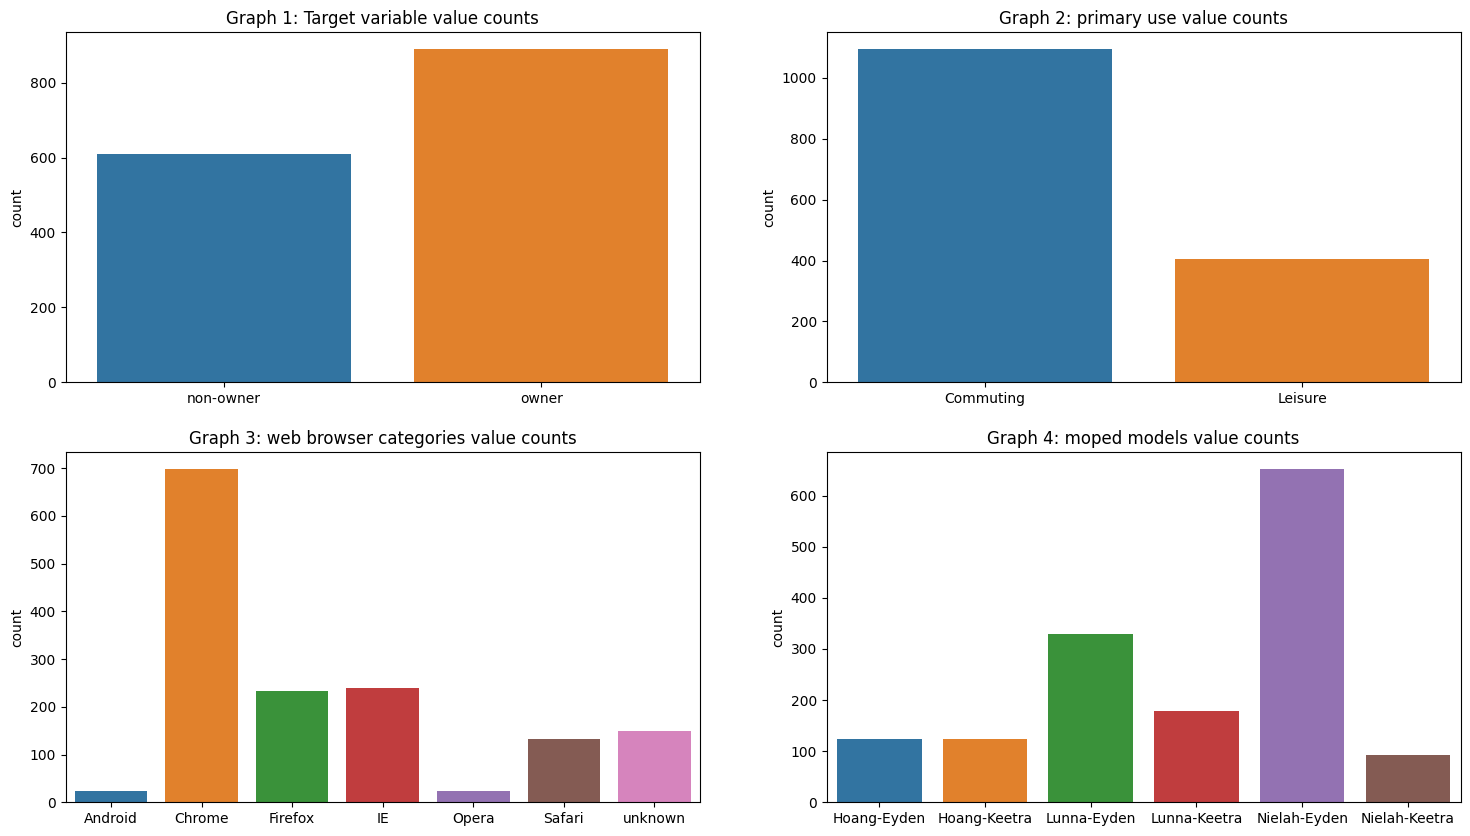

In [28]:
fig, ax = plt.subplots(2,2,figsize=(18,10))

sns.countplot(x=df['owned'],ax=ax[0,0])\
.set(xticklabels=['non-owner','owner'],xlabel='',title = 'Graph 1: Target variable value counts')

sns.countplot(x=df['primary_use'],ax=ax[0,1])\
.set(xlabel='',title = 'Graph 2: primary use value counts')

sns.countplot(x=df['web_browser'],ax=ax[1,0])\
.set(xlabel='',title = 'Graph 3: web browser categories value counts')

sns.countplot(x=df['make_model'],ax=ax[1,1])\
.set(xlabel='',title = 'Graph 4: moped models value counts')

plt.show()

### Overall rating distribution

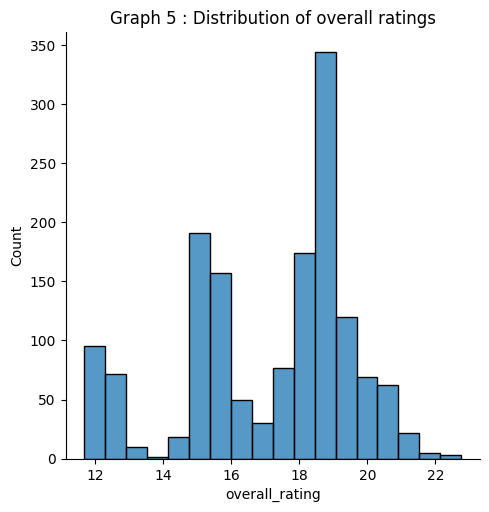

In [29]:
g = sns.displot(x=df['overall_rating'])
g.set(title='Graph 5 : Distribution of overall ratings')
plt.show()

### Relationship between ownership and overall rating

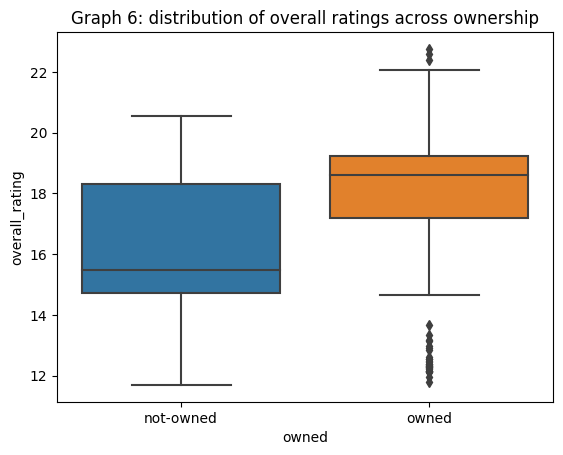

In [30]:
g = sns.boxplot(y=df['overall_rating'],x=df['owned'])
g.set(xticklabels=['not-owned','owned'],title = 'Graph 6: distribution of overall ratings across ownership')
plt.show()

# Model Fitting
- The type of machine learning problem proposed here is a classification problem (whether a reviewer is an owner ot not).
- First, I will fit a standard Logistic Regression model as a baseline model because it's easier to trarin as well as provides great results in case our data is lineary seperable (which we saw in the overall ratings vs Ownership Graph)
- The comparison model I chose is Random Forest Classifier due to the fact that we have a lot of categorical data types, less likely to be affected by outliers and can fix the problem of unbalanced data due to the randomness it provides when training the decision trees within.

### Making necessary imports, preprocessing and train/test split

In [31]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [32]:
y = df['owned']
X = df.drop('owned',axis=1)
X = pd.get_dummies(X, columns=['review_month','web_browser','make_model'])
X['primary_use'] = X['primary_use'].replace({"Commuting":1,"Leisure":0})

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=99)

### Logistic Regression

In [34]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_log_pred = log.predict(X_test)

### Random Forest Classifier

In [35]:
rdf = RandomForestClassifier(random_state=299)
rdf.fit(X_train,y_train)
y_rdf_pred = rdf.predict(X_test)

# Model Evaluation
- I will be comparing both models based on the accuracy score that calculates the ratio of correct predictions out of all predictions made by the model.
- The accuracy score of the logistic regression model is higher than the Random Forest accuracy score by 0.3, thus we can assume that the performance of the logistic regression is better than random forest.
- Calculating further metrics like the recall and F1-score and accuracy for each category, we see that the logistic regression model has better score and sometimes equal to Random Forest score in every metric, the baseline model is better at predicting non-owners reviews by far (0.73 vs 0.68), and better at making less mistakes while predicting owners reviews (0.84 vs 0.8). 

### Logistic regression accuracy score

In [36]:
accuracy_score(y_test,y_log_pred)

0.7535353535353535

### Random Forest accuracy score

In [37]:
accuracy_score(y_test,y_rdf_pred)

0.7292929292929293

### Logistic Regression Classification report

In [38]:
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.67       201
           1       0.77      0.84      0.80       294

    accuracy                           0.75       495
   macro avg       0.75      0.73      0.74       495
weighted avg       0.75      0.75      0.75       495



### Random Forest Classification report

In [39]:
print(classification_report(y_test,y_rdf_pred))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65       201
           1       0.76      0.80      0.78       294

    accuracy                           0.73       495
   macro avg       0.72      0.71      0.72       495
weighted avg       0.73      0.73      0.73       495



## Tuning the Random Forest Classifier
- Using the GridSearch we can tune the hyper parameteres of our model to achieve higher performance.
- After evaluating our tuned model we can see that the accuracy of the Random Forest classifier raised, it even surpased the logistic regression accuracy score by 0.08.
- The difference in accuracy between the Logistic regression and tuned Random Forest model may not seem large, but further inspecting other metrics in detail. We can see that the baseline model performs better at making less mistakes when predicting non-owners and at predicting owners (recall for non-owners category is 0.63 vs 0.54) and (precision for owners category is 0.77 vs 0.74), however the tuned random forest model beats the logistic regression model at correctly predicting non-owners (precision of non-owners category is 0.81 vs 0.73 ) and at making less mistakes when predicting owners (recall of owners category is 0.91 vs 0.84)

In [40]:
from sklearn.model_selection import GridSearchCV

rdf_two = RandomForestClassifier(random_state=299)

params = {
    'max_depth': np.arange(5,10),
    'n_estimators': np.arange(100,200,10),
}

In [41]:
rdf_tuned = GridSearchCV(rdf_two,params,cv=5,n_jobs=-1).fit(X_train,y_train)

In [42]:
rdf_tuned.best_params_

{'max_depth': 5, 'n_estimators': 110}

### Calculating the accuracy score for our tuned Random Forest model

In [43]:
y_rdf_pred_2 = rdf_tuned.best_estimator_.predict(X_test)
accuracy_score(y_test,y_rdf_pred_2)

0.7616161616161616

### Classification report for our tuned Random Forest model

In [44]:
print(classification_report(y_test,y_rdf_pred_2))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65       201
           1       0.74      0.91      0.82       294

    accuracy                           0.76       495
   macro avg       0.78      0.73      0.73       495
weighted avg       0.77      0.76      0.75       495



# Conclusion

- Our analysis and somewhat high model performance suggest that the realtionship between the features and the target variable ('ownership') may exist and exploited if our models gets tuned even better and adding more data to our dataset to make it more balanced across all categories.
- For the choice of the best model it will depends on what the business values more, if you want to prioritize predicting owners, random forest might be you best choice since it has slightly higher f1-score, on the other hand Logistic regression might be best if you value predicting non-owners (f1 score of the non-owners category is higher in Logistic regression) 